Looking in indexes: https://download.pytorch.org/whl/cu118


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-2-6cd4e94bb3ec>:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcastic'] = df['Sarcastic'].astype(int)  # Convert to integer if it's not already


			Linear SVC

               precision    recall  f1-score   support

           0       0.77      0.75      0.76       327
           1       0.75      0.76      0.76       317

    accuracy                           0.76       644
   macro avg       0.76      0.76      0.76       644
weighted avg       0.76      0.76      0.76       644

			LogisticRegression

               precision    recall  f1-score   support

           0       0.77      0.76      0.77       327
           1       0.76      0.77      0.76       317

    accuracy                           0.77       644
   macro avg       0.77      0.77      0.77       644
weighted avg       0.77      0.77      0.77       644

			SGDClassifier

               precision    recall  f1-score   support

           0       0.74      0.76      0.75       327
           1       0.75      0.73      0.74       317

    accuracy                           0.75       644
   macro avg       0.75      0.75      0.75       644
weighted avg   

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 - Average training loss: 0.3238268670174155
Epoch 2 - Average training loss: 0.3033471491077159
Epoch 3 - Average training loss: 0.2999193116579906
BERT Accuracy: 71.04%
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1723
           1       0.69      0.69      0.69      1495

    accuracy                           0.71      3218
   macro avg       0.71      0.71      0.71      3218
weighted avg       0.71      0.71      0.71      3218

Enter a Kannada sentence
ನೀನು ನಿನ್ನ ಕೆಲಸ ತುಂಬಾ ಚೆನ್ನಾಗಿ ಮಾಡ್ತೀಯ ಅಂಥಾ!
After Cleaning
ನೀನು ನಿನ್ನ ಚೆನ್ನಾಗಿ ಮಾಡ್ತೀಯ ಅಂಥಾ 

After Stemming
ನೀನು ನಿನ್ನ ಚೆನ್ನಾಗಿ ಮಾಡ್ತೀಯ ಅಂಥಾ
[False, True, False, True, False, False, True]
BERT Prediction: 1


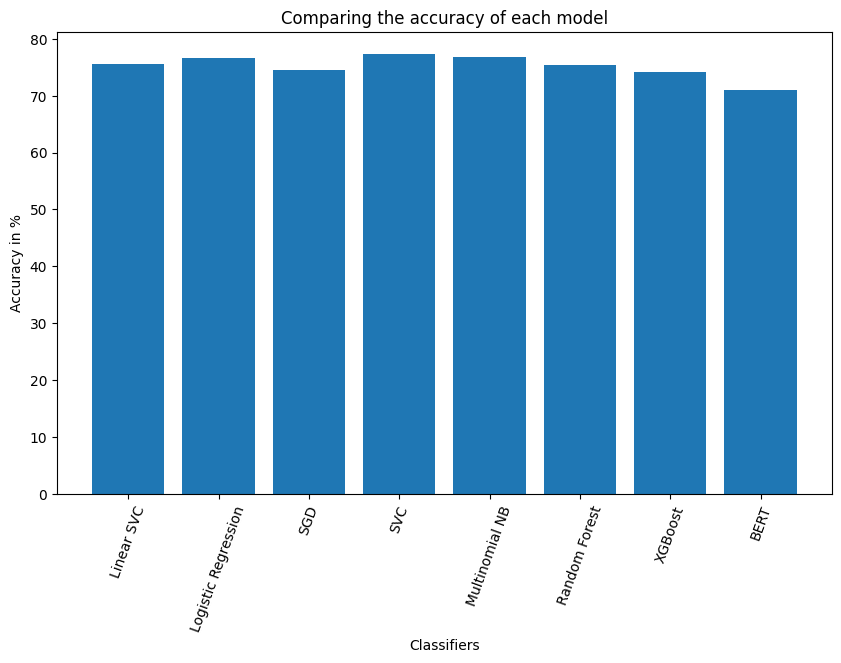

In [2]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 # Use cu118 if you have a compatible NVIDIA GPU, otherwise remove it for CPU only
!pip install --upgrade transformers

# Restart the kernel after running this cell to ensure changes take effect.
# Then, import necessary libraries:

import matplotlib.pyplot as plt
# -- coding: utf-8 --
# -- coding: utf-8 --
!pip install xgboost
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import codecs
import string
import pandas as pd
import numpy as np
import xgboost as XGBoost
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#Import and download 'punkt' resource from nltk
import nltk
# Download the necessary resources
nltk.download('punkt')  # Download the 'punkt' resource for tokenization
nltk.download('punkt_tab') # Download Punkt Tokenizer Models
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
#Import necessary libraries for BERT
from transformers import BertTokenizer, BertForSequenceClassification
# Instead of importing get_linear_schedule_with_warmup directly, import optimization
from transformers import optimization
#Import AdamW from transformers
from torch.utils.data import TensorDataset, DataLoader
from transformers import get_linear_schedule_with_warmup

"""#Reading Dataset"""
df = pd.read_excel('Trainfile.xlsx')


"""#Data Cleaning"""


def clean(data):
    stopwords = codecs.open("stopwords.txt", "r", encoding='utf-8', errors='ignore').read().split('\n')
    stopword = []
    for line in stopwords:
        data1 = line.replace('\r', "")
        stopword.append(data1)

    lexicon = []
    all_words = word_tokenize(data)
    exclude = set(string.punctuation)
    for i in all_words:
        st = ''.join(ch for ch in i if ch not in exclude)
        if (st != ''):
            lexicon.append(st)
    lexicons = []
    for word in lexicon:
        if not word in stopword:
            lexicons.append(word)
    lexi = ' '.join([str(elem) for elem in lexicons])
    return lexi

"""#Stemming"""
complex_suffixes = {
    # ... (your existing stemming rules)
# PAST TENSE simple past tense 1st person singular
    1: ["ಳಿದ್ದೆ", "ಳಲಿಲ್ಲ", "ಳಿದ್ದೆನ", "ಳಿದೆನ"],  # ---> append ಳು

    # simple past tense 1st person plural
    2: ["ದಿದೆವು", "ದಲಿಲ್ಲ", "ದಿದೆವ"],  # ---> append ದು

    # simple past tense 2nd person
    3: ["ಯಲಿಲ್ಲ"],

    # simple past tense 3rd person plural
    4: ["ಯಾಗಿದ್ದರು", "ವಾಗಿದ್ದರು", "ತಾಗಿದ್ದರು", "ದಾಗಿದ್ದರು", "ದಿದ್ದರು", "ಲಿಲ್ಲ", "ದ್ದರಾ"],

    # simple past tense 3rd person singular
    5: ["ಯಲಿಲ್ಲ", "ಲಿಲ್ಲ", "ದನ", "ದನಾ"],

    # past perfect tense 1st person singular
    6: ["ದಿದ್ದೆ", "ಡಿದ್ದೆ", "ರಲಿಲ್ಲ", "ದ್ದೆನ", "ದ್ದೆನಾ"],

    # past perfect tennse 1st person plural
    7: ["ದಿದ್ವಿ", "ರಲಿಲ್ಲ", "ದಿದ್ವಾ"],

    # past perfect, 2nd
    8: ["ದಿದ್ದೆ", "ಯುತ್ತಿದ್ದೆ", "ತ್ತಿದ್ದವರು", "ತ್ತಿದ್ದೆ", "ತಿದ್ದೆ", "ಯುತ್ತದೆ", "ತ್ತದೆ", "ಯುತ್ತಿರಲಿಲ್ಲ", "ತ್ತಿರಲಿಲ್ಲ",
        "ತಿರಲಿಲ್ಲ", "ದಿರಲಿಲ್ಲ", "ದ್ದಿದ್ದಾ", "ಯುತ್ತಿದ್ದಾ", "ತ್ತಿದ್ದಾ"],

    # past perfect 3rd plural
    9: ["ದಿದ್ದರು"],

    # past perfect 3rd singular
    10: ["ದಿದ್ದ", "ದಿದ್ದನು", "ದಿದ್ದಳು"],

    # PAST CONTINUOUS simple tense 1st singular
    11: ["ತ್ತಿದ್ದೆನೆ"],

    # past continuous 1st plural
    12: ["ಯುತ್ತಿದ್ದೆವು", "ತ್ತಿದ್ದೆವು", "ಯುತ್ತಿದ್ದೆವ", "ತ್ತಿದ್ದೆವ"],

    # past continuous 2nd
    13: ["ತ್ತಿದ್ದೆ", "ತಿರಲಿಲ್ಲ", "ತ್ತಿದ್ದ", "ತ್ತಿದ್ದಾ"],

    # past continuous 3rd plural
    14: ["ತ್ತಿದ್ದರು", "ತ್ತಿರಲಿಲ್ಲ", "ತ್ತಿದ್ದರ", "ತ್ತಿದ್ದಾರಾ"],

    # past continuous 3rd singular
    15: ["ಯುತ್ತಿದ್ದನ", "ಯುತ್ತಿದ್ದನಾ", "ಯುತ್ತಿದ್ದಳು", "ಯುತ್ತಿದ್ದನು", "ಯುತ್ತಿದ್ದಳ", "ಯುತ್ತಿದ್ದನ", "ಯುತ್ತಿದ್ದಳೆ",
         "ಯುತ್ತಿದ್ದನೆ", "ತ್ತಿದ್ದನ", "ತ್ತಿದ್ದನಾ", "ತ್ತಿದ್ದಳು", "ತ್ತಿದ್ದನು", "ತ್ತಿದ್ದಳ", "ತ್ತಿದ್ದನ", "ತ್ತಿದ್ದಳೆ",
         "ತ್ತಿದ್ದನೆ"],

    # PAST PERFECT continuous 1st singular
    16: ["ತ್ತಿದ್ದೆ", "ತ್ತಿರಲಿಲ್ಲ", "ತ್ತಿದ್ದೆನ", "ತ್ತಿದ್ದೆನಾ"],

    # past perfect continuous 1st plural
    17: ["ಯುತ್ತಿದ್ದೆವೆ", "ತ್ತಿದ್ದೆವೆ", "ಯುತ್ತಿದ್ದೆವು", "ತ್ತಿದ್ದೆವು"],

    # past p continous 2nd
    18: ["ತ್ತಿದ್ದೆ", "ತ್ತಿದ್ದೆವು", "ತ್ತಿರಲಿಲ್ಲ", "ತ್ತಿದ್ದಾ"],  # ----- not needed

    # past p continuous 3rd plural
    19: ["ತ್ತಿದ್ದರು", "ತ್ತಿದ್ದರು"],  # -------- not needed

    # past p continuous 3rd singular
    20: ["ತ್ತಿಲ್ಲ", "ತ್ತಿದ್ದಳ", "ತ್ತಿದ್ದಳು", "ತ್ತಿದ್ದನ", "ತ್ತಿದ್ದನು", "ತ್ತಿಸಿದ್ದಾರೆ"],

    # PRESENT TENSE
    # simple 1st singular
    21: ["ರುತ್ತೆನೆ", "ತ್ತೆನೆ", "ದಿಲ್ಲ", "ಯಲ್ವಾ"],

    # simple 1st plural
    22: ["ರುತ್ತೆವೆ", "ರುತ್ತೇವೆ", "ರುವುದಿಲ್ಲ", "ರುತ್ತೇವ", "ರುತ್ತೆವ", "ತ್ತೆವೆ", "ತ್ತೇವೆ", "ವುದಿಲ್ಲ", "ತ್ತೇವ", "ತ್ತೆವ"],

    # simple 2nd
    23: ["ತ್ತೀಯ", "ವುದಿಲ್ಲ", "ತ್ತಿಯ"],

    # simple 3rd plural
    24: ["ತ್ತಾರೆ", "ತ್ತಾರ"],

    # simple 3rd singular
    25: ["ತ್ತಾನೆ", "ತ್ತಾಳೆ", "ವುದಿಲ್ಲ"],

    # Present perfect 1st singular
    26: ["ದ್ದini", "ದ್ದೆನೆ", "ದಿಲ್ಲ", "ತ್ತಿದ್ದೆ", "ಲ್ಲವ", "ದೆನ"],

    # present perfect 1st plural
    27: ["ದ್ದೆವೆ", "ದ್ದೆವ"],

    # present perfect 2nd
    28: ["ಡಿದ್ದೀಯ"],

    # present perfect 3rd plural
    29: ["ತ್ತಿದ್ದಾರ", "ತ್ತಿದ್ದಾರೆ"],

    # present perfect 3rd singular
    30: ["ಯಾಗಿದೆ", "ಯಾಗಿಲ್ಲ"],

    # present continuous 1st singluar
    31: ["ತ್ತಿದ್ದೆನೆ", "ತ್ತೆನೆ", "ತ್ತೇನೆ", "ತ್ತಿದ್ದೇನೆ", "ತ್ತಿಲ್ಲ", "ತ್ತಿದ್ದೆನ"],

    # present cntinouus 1st plural
    32: ["ತ್ತಿದ್ದೇವೆ", "ತ್ತೇವೆ", "ತ್ತಿಲ್ಲ", "ತ್ತಿದ್ದೇವೆ", "ತ್ತಿದ್ದೇವ"],

    # present continous 2nd
    33: ["ಯುತ್ತಿದ್ದೀಯ", "ಯುತ್ತೀಯ", "ಯುತ್ತಿರುವೆ", "ಯುತ್ತಿಲ್ಲ", "ಯುವುದಿಲ್ಲ", "ತ್ತಿದಿಯ"],

    # present ocntinuous 3rd plural
    34: ["ತಿದರೆ", "ತ್ತಿದ್ದಾರೆ", "ತ್ತಿಲ್ಲ", "ತ್ತಿದ್ದಾರ", "ತಿರುವರ"],

    # present continuous 3rd singular
    35: ["ತ್ತಿದ್ದಾನೆ", "ತ್ತಿದ್ದಾಳೆ", "ತ್ತಾನೆ", "ತ್ತಾಳೆ", "ತ್ತಿದ್ದಾನ", "ತ್ತಿದ್ದಾಳ", "ತ್ತಿಲ್ಲ"],

    # PRESENT PERFECT continuous tense 1st singular
    36: ["ತ್ತಿದ್ದೀನಿ", "ತ್ತಿರುವೆ", "ತ್ತಿಲ್ಲ", "ತ್ತಿದ್ದೀನಿ", "ತ್ತಿಲ್ಲವೆ", "ತ್ತಿದ್ದೇನೆ"],

    # present perfect continuous tense 1st plural
    37: ["ತ್ತಿದ್ದೇವೆ", "ತ್ತಿರುವ", "ತ್ತಿರುವೆವು", "ತ್ತಿರುವೆವ", "ತ್ತಿದ್ದೇವ", "ತ್ತಿದೇವ", "ತ್ತಿಲ್ಲವ", "ತ್ತಿಲ್ಲವಾ"],

    # present perfect continuous 2nd
    38: ["ತ್ತಿದೀಯ", "ತ್ತಿಲ್ಲ", "ತ್ತಿರುವೆಯ", "ತ್ತಿದ್ದೆಯ", "ತ್ತಿಲ್ಲವ"],

    # present perfect continuous 3rd plural
    39: ["ದಲ್ಲಿದೆ", "ಯಲ್ಲಿದೆ", "ರಲ್ಲಿದೆ"],

    # present perfect continuous 3rd singular
    40: ["ತ್ತಿದ್ದಾನೆ", "ತ್ತಿದ್ದಾಳೆ", "ತ್ತಿದ್ದಾಳ", "ತ್ತಿದ್ದಾನೆ"],

    41: ["ಯಾದರೆ", "ಗಾದರೆ", "ವುದಾದರೆ", "ದಾದರೆ"],

    42: ["ಯಾಗಿಯೇ", "ಗಾಗಿಯೇ", "ದಾಗಿಯೇ", "ವಾಗಿಯೇ"],

    43: ["ವಾದರು", "ಗಾದರು", "ತಾದರು", "ದಾದರು", "ಯಾದರು", "ರಾದರು", "ಲಾದರು", "ಳಾದರು", "ವಾದರೂ", "ಗಾದರೂ", "ತಾದರೂ", "ದಾದರೂ",
         "ಯಾದರೂ", "ರಾದರೂ", "ಲಾದರರೂ", "ಳಾದರೂ"],

    44: ["ತ್ತಿದ್ದರಂತೆ", "ದೊಂದಿಗೆ", "ಯೊಂದಿಗೆ", "ರೊಂದಿಗೆ"],

    45: ["ಗಿದ್ದನು", "ಗಿದ್ದಳು", "ಗಿದ್ದರು", "ಗಿದ್ದರೂ", "ತಾದ್ದನು", "ತಾದ್ದಳು", "ತಾದ್ದರು", "ತಾದ್ದರೂ", "ದಾದ್ದನು", "ದಾದ್ದಳು",
         "ದಾದ್ದರು", "ದಾದ್ದರೂ"],

    46: ["ಯೊಂದೆ", "ವೊಂದെ", "ರೊಂದೆ", "ವೊಂದ", "ಯೊಂದ", "ರೊಂದ", "ವುದೇ"],

    47: ["ಯುವವರ", "ರುವವರ", "ಸುವವರ"],

    48: ["ದಲ್ಲೇ", "ನಲ್ಲೇ", "ನಲ್ಲಿ", "ವಲ್ಲಿ", "ದಲ್ಲಿ", "ದಲ್ಲೂ", "ಯಲ್ಲಿ", "ರಲ್ಲಿ", "ಗಳಲ್ಲಿ", "ಳಲ್ಲಿ", "ಯಲ್ಲಿನ"],

    49: ["ವವರು", "ಯವರು", "ನವರು", "ರವರು", "ದವರು", "ವವ", "ಯವ", "ನವ", "ರವ", "ದವ"],

    50: ["ಗಾಗಿ", "ದಾಗಿ", "ವಾಗಿ", "ರಾಗಿ", "ಯಾಗಿ", "ತagi", "ಕ್ಕಾಗಿ", "ವಾಗಿದ್ದು", "ವಾಗಿದ್ದ", "ಗಾಗಿದ್ದು", "ಗಾಗಿದ್ದ",
         "ರಾಗಿದ್ದು", "ರಾಗಿದ್ದ", "ದಾಗಿದ್ದು", "ದಾಗಿದ್ದ", "ತಾಗಿದ್ದು", "ತಾಗಿದ್ದ"],

    51: ["ರನ್ನ", "ನನ್ನ", "ಯನ್ನ"],

    52: ["ರನ್ನು", "ವನ್ನು", "ಯನ್ನು", "ಗಳನ್ನೇ", "ಗಳನ್ನು", "ಳನ್ನು", "ದನ್ನು"],

    53: ["ವಿರುವ", "ರುವ", "ದ್ದರೆ", "ದ್ದारे"],

    54: ["ತ್ತಾರಂತೆ", "ತ್ತಾಳಂತೆ", "ತ್ತಾನಂತೆ", "ಗಂತೆ", "ದ್ದಂತೆ", "ದಂತೆ", "ನಂತೆ", "ರಂತೆ", "ಯಂತೆ", "ಗಳಂತೆ", "ಳಂತೆ", "ವಂತೆ"],

    55: ["ಗಳೆಂದು", "ಗಂ", "ದ್ದಂ", "ದಂ", "ಯಂ", "ರಂ", "ವಂ", "ಗಿಂದ", "ದಿಂದ", "ಯಿಂದ", "ರಿಂದ", "ನಿಂದ"],

    56: ["ನಿಗೆ", "ರಿಗೆ", "ಯಿಗೆ", "ಕೆಗೆ"],

    57: ["ದ್ದೇನೆ", "ದ್ದಾನೆ", "ದ್ದಾಳೆ", "ದ್ದಾರೆ", "ದಾಗ"],

    58: ["ವಿದೆ", "ದಿದೆ", "ತಿದೆ", "ಗಿದೆ"],

    59: ["ತ್ತಿರು", "ವೆಂದು"],

    60: ["ನನ್ನೂ", "ಳನ್ನೂ", "ರನ್ನೂ"],

    61: ["ಯಾಯಿತು", "ಗಾಯಿತು", "ದಾಯಿತು"],

    62: ["ದ್ದನು", "ದ್ದಳು", "ಯಿದ್ದರು", "ದ್ದರು", "ದ್ದರೂ", "ಗಳೇ", "ಗಳು", "ಗಳ", "ಗಳಿ", "ದಳು", "ದಳ", "ವೆನು", "ವನು", "ವೆವು",
         "ವಳು", "ವಳ", "ವುದು", "ಲಾಗು", "ಗಳಾದ", "ಗಳಿಗೆ"],

    63: ["ವುದಕ್ಕೆ", "ಕ್ಕೆ", "ಗ್ಗಿ", "ದ್ದಿ", "ಲ್ಲಿ", "ನ್ನು", "ತ್ತು"],

    64: ["ವಾಯಿತು", "ಗಾಯಿತು", "ದಾಯಿತು", "ತಾಯಿತು", "ಲಾಯಿತು", "ನಾಯಿತು"],

    65: ["ವಿದ್ದು", "ವೆಂದಾಗ"],

    66: ["ವನ್ನೇ", "ವೇಕೆ"],

    67: ["ರಾದ", "ವಾದ", "ಗಾದ", "ಯಾದ", "ರಾಗುವ"],

    68: ["ವಾದುದು", "ರಾದುದು", "ಗಾದುದು", "ಯಾದುದು", "ದಾದುದು"],

    69: ["ಯಾರು", "ದಾರು", "ಗಾರು", "ರಾರು"],

    70: ["ಗಳಿಸಿ", "ಗಳಿಸು", "ಗಳಿವೆ", "ಗಳಿವ", "ಗಳಿವು"],

    71: ["ಯು", "ದ", "ವಿಕೆ", "ದೇ", "ರು", "ಳ", "ಳೆ", "ಲಿದೆ", "ದೆ", "ರೆ", "ಗೆ", "ವೆ", "ತೆ", "ಗೂ"],

    72: ["ರದ", "ಮದ", "ನದ"],

    73: ["ಡಲು", "ಲಾಗುತ್ತದೆ", "ಸಲು", "ಸಿದ್ದಾಳೆ", "ಸಿದಾಗ", "ಸಲು", "ಸಿದರು", "ಸಿದನು", "ಸಿದಳು", "ಸಿದ್ದೇ", "ಕಿದೀನಿ"]
}
add_1 = ["ು"]
def kannada_root(word, inde):
    global flag
    for L in complex_suffixes[72]:
        if len(word) > len(L) + 1:
            if word.endswith(L):
                inde.append(72)
                return (word[:-(len(L) - 1)], inde)
    for L in complex_suffixes[73]:
        if len(word) > len(L) + 1:
            if word.endswith(L):
                flag = 1
                word = word[:-(len(L) - 1)]
                word = word + add_1[0]
                inde.append(73)
                return (kannada_root(word, inde))
    L = 1
    while L <= 70:
        for suffix in complex_suffixes[L]:
            if len(word) > len(suffix) + 1:
                if word.endswith(suffix):
                    flag = 1
                    inde.append(L)
                    return (kannada_root(word[:-(len(suffix))], inde))
        L = L + 1
    if flag == 0:
        for L in complex_suffixes[71]:
            if len(word) - len(L) > len(L) + 1:
                if word.endswith(L):
                    inde.append(71)
                    return (word[:-(len(L))], inde)
    return word, inde

flag = 0
x = []

def stemming(data):
    x = data.split()
    y = []
    for j in range(len(x)):
        flag = 0
        inde = []
        root = x[j]
        root, inde = kannada_root(x[j], inde)
        y.append(root)
    stemmed = ' '.join([str(elem) for elem in y])
    return stemmed

df['Sentences'] = df['Sentences'].astype(str)

"""#Data Cleaning and Stemming of Dataset"""
df['Sentences'] = df['Sentences'].apply(lambda x: clean(x))
df['Sentences'] = df['Sentences'].apply(lambda x: stemming(x))

"""#Drop NaN values from both 'Sentences' and 'Sarcastic' columns"""
df = df.dropna(subset=['Sarcastic', 'Sentences'])

"""#Ensure 'Sarcastic' column is of the correct type"""
df['Sarcastic'] = df['Sarcastic'].astype(int)  # Convert to integer if it's not already

"""#TF-IDF for Feature Extraction"""
tfidf = TfidfVectorizer()

"""#Splitting the Data into Training and Testing"""
X = df['Sentences']
y = df['Sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the vectorizer to the training data only
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

"""#Training of ML Models"""
# Train the models using the transformed data
clf1 = LinearSVC(dual=False)
clf2 = LogisticRegression()
clf3 = SGDClassifier()
clf4 = SVC()
clf6 = MultinomialNB()
clf7 = RandomForestClassifier()
clf8 = XGBoost.XGBClassifier()

clf1.fit(X_train_tfidf, y_train)
clf2.fit(X_train_tfidf, y_train)
clf3.fit(X_train_tfidf, y_train)
clf4.fit(X_train_tfidf, y_train)
clf6.fit(X_train_tfidf, y_train)
clf7.fit(X_train_tfidf, y_train)
clf8.fit(X_train_tfidf, y_train)

"""#Testing of ML Models"""
y_pred1 = clf1.predict(X_test_tfidf)
y_pred2 = clf2.predict(X_test_tfidf)
y_pred3 = clf3.predict(X_test_tfidf)
y_pred4 = clf4.predict(X_test_tfidf)
y_pred6 = clf6.predict(X_test_tfidf)
y_pred7 = clf7.predict(X_test_tfidf)
y_pred8 = clf8.predict(X_test_tfidf)

"""#Classification Report"""
print("\t\t\tLinear SVC\n\n", classification_report(y_test, y_pred1))
print("\t\t\tLogisticRegression\n\n", classification_report(y_test, y_pred2))
print("\t\t\tSGDClassifier\n\n", classification_report(y_test, y_pred3))
print("\t\t\tSVC\n\n", classification_report(y_test, y_pred4))
print("\t\t\tMultinomialNB\n\n", classification_report(y_test, y_pred6))
print("\t\t\tRandomForestClassifier\n\n", classification_report(y_test, y_pred7))
print("\t\t\tXGBoost\n\n", classification_report(y_test, y_pred8))

"""#Confusion Matrix"""
print("Linear SVC")
confusion_matrix(y_test, y_pred1)

print("LogisticRegression")
confusion_matrix(y_test, y_pred2)

print('SGDClassifier')
confusion_matrix(y_test, y_pred3)

print('SVC')
confusion_matrix(y_test, y_pred4)

print('MultinomialNB')
confusion_matrix(y_test, y_pred6)

print('RandomForestClassifier')
confusion_matrix(y_test, y_pred7)

print('XGBoost')
confusion_matrix(y_test, y_pred8)

"""#Accuracy Score"""
accuracy_LinearSVC = accuracy_score(y_test, y_pred1) * 100
accuracy_LogisticRegression = accuracy_score(y_test, y_pred2) * 100
accuracy_SGDClassifier = accuracy_score(y_test, y_pred3) * 100
accuracy_SVC = accuracy_score(y_test, y_pred4) * 100
accuracy_MultinomialNB = accuracy_score(y_test, y_pred6) * 100
accuracy_RandomForestClassifier = accuracy_score(y_test, y_pred7) * 100
accuracy_XGBoost = accuracy_score(y_test, y_pred8) * 100

print("Linear SVC")
print(round(accuracy_LinearSVC, 2), "%\n")

print("LogisticRegression")
print(round(accuracy_LogisticRegression,2), "%\n")

print('SGDClassifier')
print(round(accuracy_SGDClassifier,2), "%\n")

print('SVC')
print(round(accuracy_SVC,2), "%\n")

print('MultinomialNB')
print(round(accuracy_MultinomialNB,2), "%\n")

print('RandomForestClassifier')
print(round(accuracy_RandomForestClassifier,2), "%\n")

print('XGBoost')
print(round(accuracy_XGBoost,2), "%\n")

"""#BERT Implementation"""
# Tokenize data for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts, labels, max_len=128): # Reduced max_len
    input_ids = []
    attention_masks = []
    labels = [int(label) for label in labels]
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels, dtype=torch.long)
    return input_ids, attention_masks, labels

# Tokenize the dataset
train_input_ids, train_attention_masks, train_labels = tokenize_data(df['Sentences'].tolist(), df['Sarcastic'].tolist())
test_input_ids, test_attention_masks, test_labels = tokenize_data(df['Sentences'].tolist(), df['Sarcastic'].tolist())

# Create DataLoader
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True) # Increased batch size
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) # Increased batch size

# Load BERT model
# Fine-tune a pre-trained BERT model
#model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
# If using bert-base-uncased
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
#  num_labels should be set to 2 for your binary classification task
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 3
total_steps = len(train_dataloader) * epochs  # Total steps = batches per epoch * number of epochs
accumulation_steps = 2 # Accumulate gradients over 2 batches

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=0,
      num_training_steps=total_steps
      )

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for i, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss / accumulation_steps # Normalize loss
        total_loss += loss.item()
        loss.backward()

        if (i + 1) % accumulation_steps == 0: # Update parameters every accumulation_steps
            optimizer.step()
            scheduler.step()
            model.zero_grad()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} - Average training loss: {avg_train_loss}")

# Evaluation
model.eval()
predictions, true_labels = [], []
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    predictions.append(logits)
    true_labels.append(label_ids)

predictions = np.concatenate(predictions, axis=0)
true_labels = np.concatenate(true_labels, axis=0)
pred_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy_BERT = accuracy_score(true_labels, pred_labels) * 100
print(f"BERT Accuracy: {accuracy_BERT:.2f}%")
print(classification_report(true_labels, pred_labels))

"""#Custom User Input"""
print("Enter a Kannada sentence")
x = input()
x = clean(x)
print("After Cleaning")
print(x,'\n')
print("After Stemming")
x = stemming(x)
print(x)

vec = tfidf.transform([x])
vec.shape

"""#Testing User Input On All Classifiers"""
result1=clf1.predict(vec)
result2=clf2.predict(vec)
result3=clf3.predict(vec)
result4=clf4.predict(vec)
result6=clf6.predict(vec)
result7=clf7.predict(vec)
result8=clf8.predict(vec)
res=[bool(result1[0]),bool(result2[0]),bool(result3[0]),bool(result4[0]),bool(result6[0]),bool(result7[0]),bool(result8[0])]
print(res)

"""#BERT Prediction on Custom Input"""
def predict_sarcasm(text):
    model.eval()
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    pred_label = np.argmax(logits, axis=1)
    return pred_label[0]

result_bert = predict_sarcasm(x)
print("BERT Prediction:", result_bert)

"""#Comparing Accuracies"""
Accuracy = [accuracy_LinearSVC, accuracy_LogisticRegression, accuracy_SGDClassifier, accuracy_SVC,
            accuracy_MultinomialNB, accuracy_RandomForestClassifier, accuracy_XGBoost, accuracy_BERT]
Methods = ['Linear SVC', 'Logistic Regression', 'SGD', 'SVC', 'Multinomial NB', 'Random Forest', 'XGBoost', 'BERT']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(10, 6))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy in %')
plt.xticks(rotation=70)
plt.show()